In [ ]:
from modules.DLA_model import Diffusion

from modules.dla_testing import run_dla_simulation, animate_diffusion

In [ ]:
grid_size = 100
diff = Diffusion(grid_size, 1.6)

eta = 1.6
num_iterations = 200

results, clusters = run_dla_simulation(diff, eta, num_iterations)

animate_diffusion(results, clusters, save_animation=True, animation_name='dla_100_500_1.mp4')

In [ ]:
grid_size = 100
diff = Diffusion(grid_size, 1.6)

eta = 1.6
num_iterations = 200

results, clusters = run_dla_simulation(diff, eta, num_iterations)

animate_diffusion(results, clusters, save_animation=True, animation_name='dla_100_500_1.mp4')

In [ ]:
import numpy as np
concentrations = np.linspace(0,1,100000)

In [ ]:
eta = 2
concentrations_eta = concentrations ** eta

In [ ]:
eta = 2

boundary_concentration = [0.5 ** eta for _ in range(10000)]

In [ ]:
import time

start_time_full_loop = time.time()
boundary_concentration = [0.01238940202 ** eta for _ in range(10000)]
print("--- %s seconds add boundary ---" % (time.time() - start_time_full_loop))

In [ ]:
start_time_full_loop = time.time()
boundary_concentration = np.pow([0.01238940202 for _ in range(100000)], eta)
print("--- %s seconds add boundary ---" % (time.time() - start_time_full_loop))

In [3]:
from modules.DLA_model import Diffusion
import numpy as np

def compare_omega(eta=1):
    grid_size = 100
    num_iterations = 30

    omegas = [1.0, 1.4]
    results = np.zeros(len(omegas))
    for i, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        for j in range(10):
            print(f'Running simulation {j + 1} out of 10')
            diffusion = Diffusion(grid_size, eta, initial_point="bottom")

            results[i] += diffusion.run_simulation(num_iterations, omega)

    results /= 10

    return results

In [4]:
results = compare_omega(eta=1)

Running simulation for omega = 1.0
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10
Running simulation for omega = 1.4
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10


In [5]:
print(results)

[2714.5 2206.3]


In [6]:
from modules.DLA_model import Diffusion
import numpy as np

def compare_omega(eta=1):
    grid_size = 100
    num_iterations = 30

    omegas = [1.0, 1.4]
    results = np.zeros((len(omegas), 10))
    for i, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        for j in range(10):
            print(f'Running simulation {j + 1} out of 10')
            diffusion = Diffusion(grid_size, eta, initial_point="bottom")

            results[i][j] = diffusion.run_simulation(num_iterations, omega)

    return results

In [7]:
results = compare_omega(eta=1)

Running simulation for omega = 1.0
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10
Running simulation for omega = 1.4
Running simulation 1 out of 10
Running simulation 2 out of 10
Running simulation 3 out of 10
Running simulation 4 out of 10
Running simulation 5 out of 10
Running simulation 6 out of 10
Running simulation 7 out of 10
Running simulation 8 out of 10
Running simulation 9 out of 10
Running simulation 10 out of 10


In [ ]:
print(results)

# [[2217. 3268. 2041. 2666. 2549. 3004. 2216. 2933. 4195. 3582.]
#  [2750. 2154. 1588. 1543. 2110. 2989. 1784. 2198. 1905. 2573.]]


[[2217. 3268. 2041. 2666. 2549. 3004. 2216. 2933. 4195. 3582.]
 [2750. 2154. 1588. 1543. 2110. 2989. 1784. 2198. 1905. 2573.]]


In [9]:
print(sum(results[0]) / 10)
print(sum(results[1]) / 10)

2867.1
2159.4


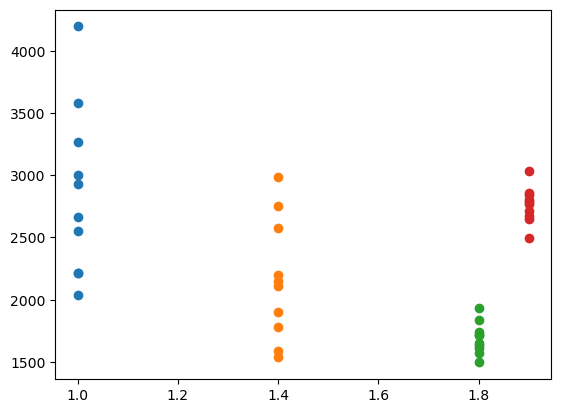

In [13]:
import matplotlib.pyplot as plt

results_2 = [[1834, 1713, 1717, 1743, 1612, 1650, 1496, 1937, 1633, 1571],[2840, 2495, 2861, 2785, 2803, 2713, 2671, 3034, 2765, 2650]]

plt.scatter([1.0 for _ in range(10)], results[0])
plt.scatter([1.4 for _ in range(10)], results[1])
plt.scatter([1.8 for _ in range(10)], results_2[0])
plt.scatter([1.9 for _ in range(10)], results_2[1])

plt.show()

In [17]:
import time
from modules.DLA_model import Diffusion
import numpy as np
from joblib import Parallel, delayed

def compare_omega(i):
    print(f'Running simulation {i + 1} out of 20')
    eta = 1
    grid_size = 100
    num_iterations = 50

    omegas = [1.0, 1.4, 1.8, 1.9]
    results = np.zeros(len(omegas))
    for j, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        diffusion = Diffusion(grid_size, eta, initial_point="bottom")

        results[j] = diffusion.run_simulation(num_iterations, omega)

    return results

start_time = time.time()
results = Parallel(n_jobs=-2)(delayed(compare_omega)(i) for i in range(20))
print("--- %s seconds ---" % (time.time() - start_time))

print(results)

Running simulation 2 out of 20
Running simulation for omega = 1.0
Running simulation 4 out of 20
Running simulation for omega = 1.0
Running simulation 6 out of 20
Running simulation for omega = 1.0
Running simulation 3 out of 20
Running simulation for omega = 1.0
Running simulation 1 out of 20
Running simulation for omega = 1.0
Running simulation 5 out of 20
Running simulation for omega = 1.0
Running simulation 7 out of 20
Running simulation for omega = 1.0
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.9
Running simul

In [ ]:
import time
from modules.DLA_model import Diffusion
import numpy as np
from joblib import Parallel, delayed

def compare_omega(i):
    print(f'Running simulation {i + 1} out of 20')
    eta = 1
    grid_size = 50
    num_iterations = 10

    omegas = [1.8, 1.9]
    results = np.zeros(len(omegas))
    for j, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        diffusion = Diffusion(grid_size, eta, initial_point="bottom")

        results[j] = diffusion.run_simulation(num_iterations, omega)

    return results
    

start_time = time.time()
results = Parallel(n_jobs=-2)(delayed(compare_omega)(i) for i in range(3))

print("--- %s seconds ---" % (time.time() - start_time))

print(results)

Running simulation 1 out of 20Running simulation 2 out of 20

Running simulation for omega = 1.8Running simulation for omega = 1.8Running simulation 3 out of 20


Running simulation for omega = 1.8
Running simulation for omega = 1.9
Running simulation for omega = 1.9
Running simulation for omega = 1.9


NameError: name 'start_time_full_loop' is not defined

/var/folders/k1/f26647s95vl9yq8gf54lz3gw0000gn/T/ipykernel_55026/3632646909.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np_results, labels=omegas)


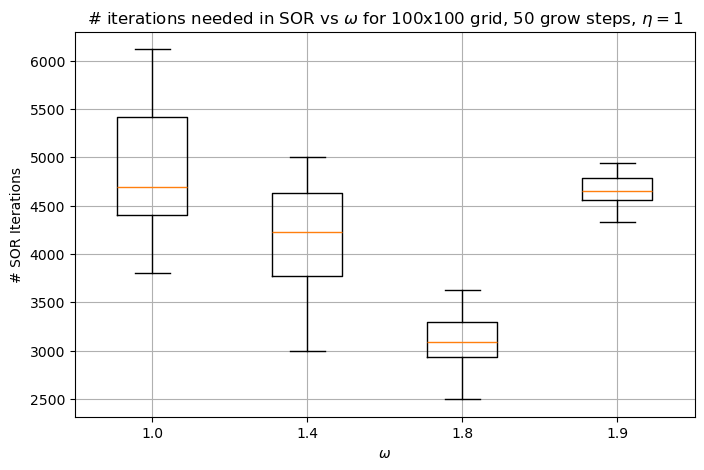

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

np_results = np.array(results)

omegas = [1.0, 1.4, 1.8, 1.9]
plt.figure(figsize=(8, 5))
plt.boxplot(np_results, labels=omegas)
plt.xlabel(r'$\omega$')
plt.ylabel('# SOR Iterations')
plt.title(r'# iterations needed in SOR vs $\omega$ for 100x100 grid, 50 grow steps, $\eta = 1$')
plt.grid(True)
plt.show()
plt.savefig("omega_vs_sor_eta_1.png", dpi=300, bbox_inches='tight')

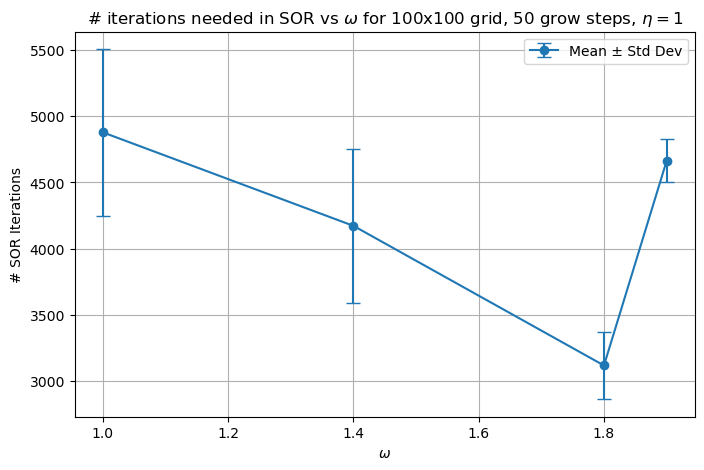

<Figure size 640x480 with 0 Axes>

In [23]:
means = np.mean(np_results, axis=0)
stds = np.std(np_results, axis=0)

plt.figure(figsize=(8, 5))
plt.errorbar(omegas, means, yerr=stds, fmt='o-', capsize=5, label='Mean ± Std Dev')
plt.xlabel(r'$\omega$')
plt.ylabel('# SOR Iterations')
plt.title(r'# iterations needed in SOR vs $\omega$ for 100x100 grid, 50 grow steps, $\eta = 1$')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("omega_vs_sor_eta_1_mean.png", dpi=300, bbox_inches='tight')

In [ ]:
def compare_omega(i):
    print(f'Running simulation {i + 1} out of 20')
    eta = 1
    grid_size = 100
    num_iterations = 50

    omegas = [1.75, 1.8, 1.85]
    results = np.zeros(len(omegas))
    for j, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        diffusion = Diffusion(grid_size, eta, initial_point="bottom")

        results[j] = diffusion.run_simulation(num_iterations, omega)

    return results

start_time = time.time()
results_closer_omegas = Parallel(n_jobs=-2)(delayed(compare_omega)(i) for i in range(10))
print("--- %s seconds ---" % (time.time() - start_time))

Running simulation 5 out of 20
Running simulation for omega = 1.75
Running simulation 6 out of 20
Running simulation for omega = 1.75
Running simulation 4 out of 20
Running simulation for omega = 1.75
Running simulation 1 out of 20
Running simulation for omega = 1.75
Running simulation 2 out of 20
Running simulation for omega = 1.75
Running simulation 3 out of 20
Running simulation for omega = 1.75
Running simulation 7 out of 20
Running simulation for omega = 1.75
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.85
Running simulation for omega = 1.85
Running simulation for omega = 1.85
Running simulation for omega = 1.85
Running simulation for omega = 1.85
Running simulation for omega = 1.85
Running simulation for omega = 1.85
Running simulation 8 out of 20
Run

/var/folders/k1/f26647s95vl9yq8gf54lz3gw0000gn/T/ipykernel_55026/290455856.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np_results_closer_omegas, labels=omegas)


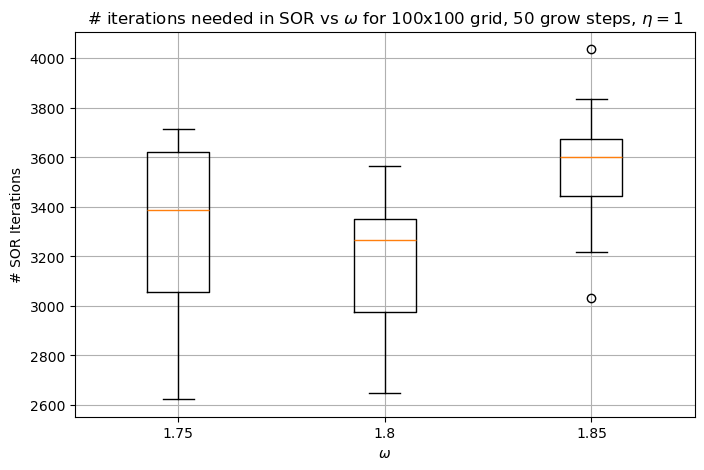

In [25]:
np_results_closer_omegas = np.array(results_closer_omegas)

omegas = [1.75, 1.8, 1.85]
plt.figure(figsize=(8, 5))
plt.boxplot(np_results_closer_omegas, labels=omegas)
plt.xlabel(r'$\omega$')
plt.ylabel('# SOR Iterations')
plt.title(r'# iterations needed in SOR vs $\omega$ for 100x100 grid, 50 grow steps, $\eta = 1$')
plt.grid(True)
plt.show()
# plt.savefig("omega_vs_sor_eta_1.png", dpi=300, bbox_inches='tight')

In [26]:
def compare_omega(i):
    print(f'Running simulation {i + 1} out of 20')
    eta = 0
    grid_size = 100
    num_iterations = 50

    omegas = [1.0, 1.4, 1.8, 1.9]
    results = np.zeros(len(omegas))
    for j, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        diffusion = Diffusion(grid_size, eta, initial_point="bottom")

        results[j] = diffusion.run_simulation(num_iterations, omega)

    return results

start_time = time.time()
results_eta_0 = Parallel(n_jobs=-2)(delayed(compare_omega)(i) for i in range(20))
print("--- %s seconds ---" % (time.time() - start_time))

Running simulation 1 out of 20
Running simulation for omega = 1.0
Running simulation 2 out of 20
Running simulation for omega = 1.0
Running simulation 3 out of 20
Running simulation for omega = 1.0
Running simulation 5 out of 20
Running simulation for omega = 1.0
Running simulation 4 out of 20
Running simulation for omega = 1.0
Running simulation 6 out of 20
Running simulation for omega = 1.0
Running simulation 7 out of 20
Running simulation for omega = 1.0
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.9
Running simul

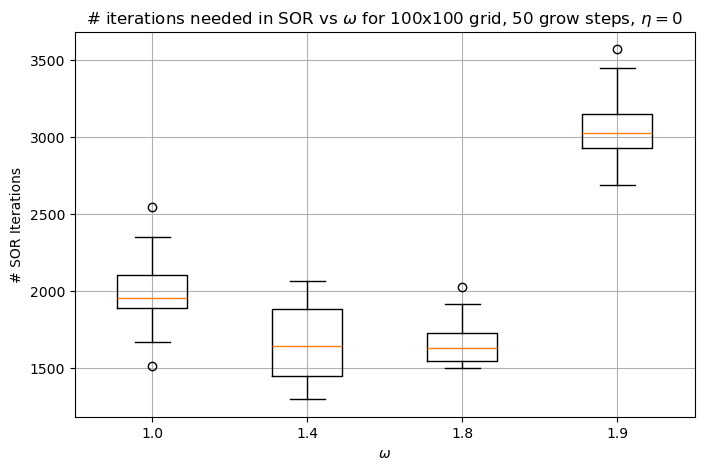

<Figure size 640x480 with 0 Axes>

In [ ]:
np_results_eta_0 = np.array(results_eta_0)

omegas = [1.0, 1.4, 1.8, 1.9]
plt.figure(figsize=(8, 5))
plt.boxplot(np_results_eta_0, tick_labels=omegas)
plt.xlabel(r'$\omega$')
plt.ylabel('# SOR Iterations')
plt.title(r'# iterations needed in SOR vs $\omega$ for 100x100 grid, 50 grow steps, $\eta = 0$')
plt.grid(True)
plt.show()
# plt.savefig("omega_vs_sor_eta_0.png", dpi=300, bbox_inches='tight')

In [30]:
def compare_omega(i):
    print(f'Running simulation {i + 1} out of 20')
    eta = 2
    grid_size = 100
    num_iterations = 50

    omegas = [1.0, 1.4, 1.8, 1.9]
    results = np.zeros(len(omegas))
    for j, omega in enumerate(omegas):
        print(f'Running simulation for omega = {omega}')
        diffusion = Diffusion(grid_size, eta, initial_point="bottom")

        results[j] = diffusion.run_simulation(num_iterations, omega)

    return results

start_time = time.time()
results_eta_2 = Parallel(n_jobs=-2)(delayed(compare_omega)(i) for i in range(20))
print("--- %s seconds ---" % (time.time() - start_time))

Running simulation 1 out of 20
Running simulation for omega = 1.0
Running simulation 2 out of 20
Running simulation for omega = 1.0
Running simulation 3 out of 20
Running simulation for omega = 1.0
Running simulation 4 out of 20
Running simulation for omega = 1.0
Running simulation 5 out of 20
Running simulation for omega = 1.0
Running simulation 6 out of 20
Running simulation for omega = 1.0
Running simulation 7 out of 20
Running simulation for omega = 1.0
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.4
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.8
Running simulation for omega = 1.9
Running simul

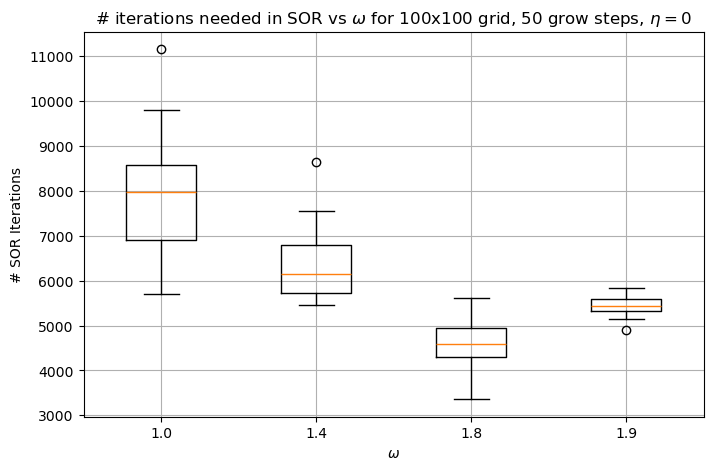

<Figure size 640x480 with 0 Axes>

In [ ]:
np_results_eta_2 = np.array(results_eta_2)

omegas = [1.0, 1.4, 1.8, 1.9]
plt.figure(figsize=(8, 5))
plt.boxplot(np_results_eta_2, tick_labels=omegas)
plt.xlabel(r'$\omega$')
plt.ylabel('# SOR Iterations')
plt.title(r'# iterations needed in SOR vs $\omega$ for 100x100 grid, 50 grow steps, $\eta = 2$')
plt.grid(True)
plt.show()
plt.savefig("omega_vs_sor_eta_2.png", dpi=300, bbox_inches='tight')

In [1]:
from modules.DLA_model import Diffusion, compare_omegas, plot_omega_comparison
from joblib import Parallel, delayed

In [2]:
grid_size = 10
growth_iterations = 20

def run_simulation_and_plot(eta):
    diffusion = Diffusion(grid_size, eta, initial_point="bottom")
    diffusion.run_simulation(growth_iterations)
    diffusion.plot(eta, save=True, filename=f"diffusion_eta_{eta}_200_v2.png")

_ = Parallel(n_jobs=-2)(
        delayed(run_simulation_and_plot)(eta) for eta in [0, 1, 2]
    )

Figure(640x480)
Figure(640x480)
Figure(640x480)


In [1]:
from modules.DLA_model import Diffusion, compare_omegas, plot_omega_comparison
from joblib import Parallel, delayed

grid_size = 100
growth_iterations = 200

def run_simulation_and_plot(eta):
    diffusion = Diffusion(grid_size, eta, initial_point="bottom")
    diffusion.run_simulation(growth_iterations)
    diffusion.plot(eta, save=True, filename=f"diffusion_eta_{eta}_200.png")

_ = Parallel(n_jobs=-2)(
        delayed(run_simulation_and_plot)(eta) for eta in [0, 1, 2]
    )

Figure(640x480)
Figure(640x480)
Figure(640x480)


## Analysing the cluster shape

Lastly, we analyse the shape of the cluster so that we can compare it to the Monte Carlo simulation. 

Again, for three values of $\eta = 0, 1, 2$ and $200$ growth steps, we run $20$ simulations each and measure the size of the perimeter and the width and height of the cluster. We then plot our results. We use the optimal $\omega$ for each $\eta$ found in the previous part.

Disclamer: execution of each of the three following cells can take up to

In [ ]:
from modules.DLA_model import Diffusion
from joblib import Parallel, delayed

grid_size = 100
growth_iterations = 200
num_simulations = 20
eta = 0
omega = 1.6

def run_simulation_and_measure():
    diffusion = Diffusion(grid_size, eta, initial_point="bottom")
    diffusion.run_simulation(growth_iterations, omega)

    return [diffusion.get_perimeter_size(), diffusion.get_width(), diffusion.get_height()]

clusters_eta_0 = Parallel(n_jobs=-2)(
        delayed(run_simulation_and_measure)() for _ in range(num_simulations)
    )

In [16]:
import numpy as np

clusters_0 = np.array(clusters_0)

print(f"The average perimeter size for cluster size {grid_size} and η = {eta} is {np.mean([cluster[0] for cluster in clusters_0])}")
print(f"The average width for cluster size {grid_size} and η = {eta} is {np.mean([cluster[1] for cluster in clusters_0])}")
print(f"The average height for cluster size {grid_size} and η = {eta} is {np.mean([cluster[2] for cluster in clusters_0])}")

The average perimeter size for cluster size 20 and η = 0 is 11.2
The average width for cluster size 20 and η = 0 is 4.9
The average height for cluster size 20 and η = 0 is 2.3
